# Homework : 8 Machine Learning - 1 (Supervised Methods)

## Universal Function Approximation

### Import all Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1] (b)

## b) Let f(𝑥) denote the approximation using the size 𝑀 grid Gm . Produce a plot of f(x) and fhat(x) for 𝑀 ∈ {2,4,8,16}.

### Generating 10000 points between the limits 0 and 1 since 𝑥 ∈ [0, 1]


In [2]:
# Generating 10000 points between the limits 0 and 1 since 𝑥 ∈ [0, 1]
X_initial = np.linspace(0, 1, 10000)
F_X = np.exp(-2*X_initial) * np.cos(4 * np.pi * X_initial)

### Produce a plot of f(x).

Text(0, 0.5, 'F(x)')

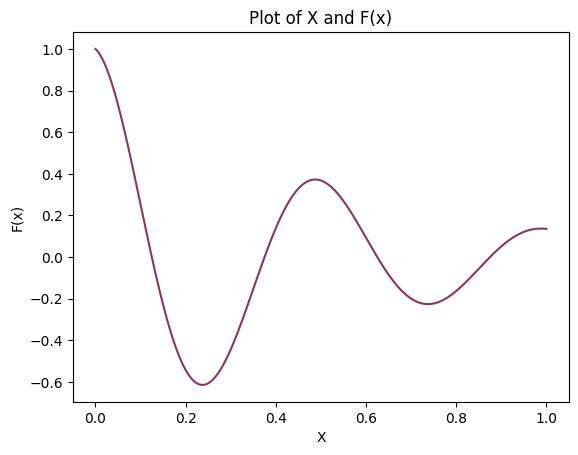

In [3]:
plt.plot(X_initial, F_X, c = "#89375F")
plt.title("Plot of X and F(x)")
plt.xlabel("X")
plt.ylabel("F(x)")

### Generating X based on Gm(x)

In [4]:
def generateF_X(X):
    F_Hat_X = np.exp(-2*X) * np.cos(4 * np.pi * X)

    return F_Hat_X

In [5]:
def plotNMSE(NMSE_dB, M_Arr):
    plt.plot(M_Arr, NMSE_dB, c = "#B68973")
    plt.scatter(M_Arr, NMSE_dB, c = "#A27B5C", alpha = 0.87, marker="o")
    plt.title("Plot of NMSE(M) Vs. M")
    plt.xlabel("M")
    plt.ylabel("NMSE(M) in dB")
    

In [6]:
def plotFHat(M_List, colors):

    # Create the subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))


    # Iterate over the subplots and plot the data 
    for j, ax in enumerate(axs.flat):
        X = np.array([i / (M_List[j] - 1) for i in range(M_List[j])])
        ax.plot(X, generateF_X(X), color = colors[j], label="Approximation of Fn.")
        ax.plot(X_initial, generateF_X(X_initial), color = "grey", label="Original fn.")
        
        ax.set_ylabel('FHat(X)')
        ax.set_xlabel('X')
        ax.set_title(f"Plot of X and FHat(X) for M  = {M_List[j]}")
        ax.legend()

    # Show the plot
    plt.show()
        

In [7]:
def normalized_mse_01(f, f_hat, x_grid, G=10000):
    # f: target function
    # f_hat: values of f_hat on the grid x_grid on [0,1]
    # x_grid a "coarse" grid on [0,1].  This has M point from the approximation.
    # G: grid size for a fine grid used to approximate the integral.

    x_fine =  np.linspace(0, 1, G)                  # create the fine grid
    f_fine = f(x_fine)                              # evaluate f on the fine grid
    f_hat_fine = np.interp(x_fine, x_grid, f_hat)   # interpolate f_hat to the fine grid
    sq_error = (f_fine - f_hat_fine) ** 2           # compute squared error
    mse = np.mean(sq_error)                         # this is a scalar multiple of the integral (approximately)
    ref = np.mean(f_fine ** 2)                      # Energy in target; off by same scalar as mse
    
    return mse / ref                                # scalar values cancel 

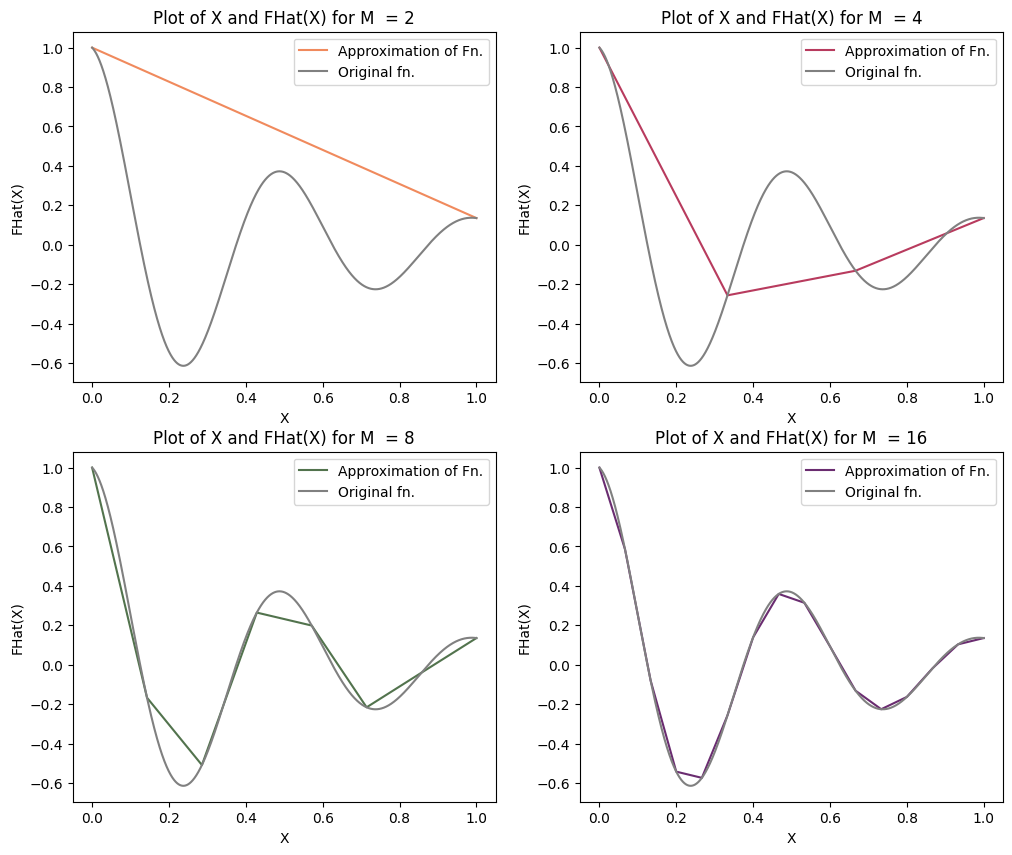

In [8]:
M_List = [2, 4, 8, 16]
colors = ["#F08A5D", "#B83B5E", "#52734D", "#6A2C70"]

plotFHat(M_List, colors)

## Produce a plot of NMSE(M) Vs. M; more specifically, plot the NMSE in dB – i.e., NMSEdB(M) = 10log10 M𝑁𝑀𝑆𝐸(𝑀) Vs. M. Plot this for each integer 𝑀 ≥ 2 up to large enough 𝑀 so that the NMSE goes below -40 dB.

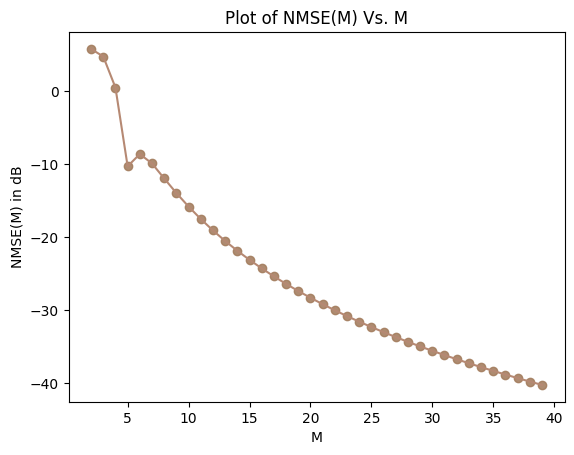

In [9]:
NMSE_dB = []
M_Arr = []
M = 2

current_NMSE_dB = float("inf")

while current_NMSE_dB > -40:

    M_Arr.append(M)
    X = np.array([i / (M - 1) for i in range(M)])
    F_Hat_X = generateF_X(X)
    current_NMSE = normalized_mse_01(generateF_X, F_Hat_X, X, G=10000)
    current_NMSE_dB = 10 * np.log10(current_NMSE)
    NMSE_dB.append(current_NMSE_dB)
    M += 1

plotNMSE(NMSE_dB, M_Arr)

## 1] (d) Interpretation of the NMSE results:

### i] Are some values of 𝑁𝑀𝑆𝐸dB(𝑀) on your plot greater than 0? If so, explain what this means.

### Yes, some of the values in the NMSEdB plot are above 0dB. 
### NMSE in dB can be understood in a way which shows a metric to measure the loss of the function approximation. We can say that a Loss of value above 0dB can be considered as an indication fo higher Mean Squared Error (MSE).

## ii] Check if the 𝑁𝑀𝑆𝐸 monotonically decreases. Produce plots of the form from part (b) for several consecutive values of 𝑀 on a range where the 𝑁𝑀𝑆𝐸 is not monotonically decreasing (i.e., where it increases and then decreases)

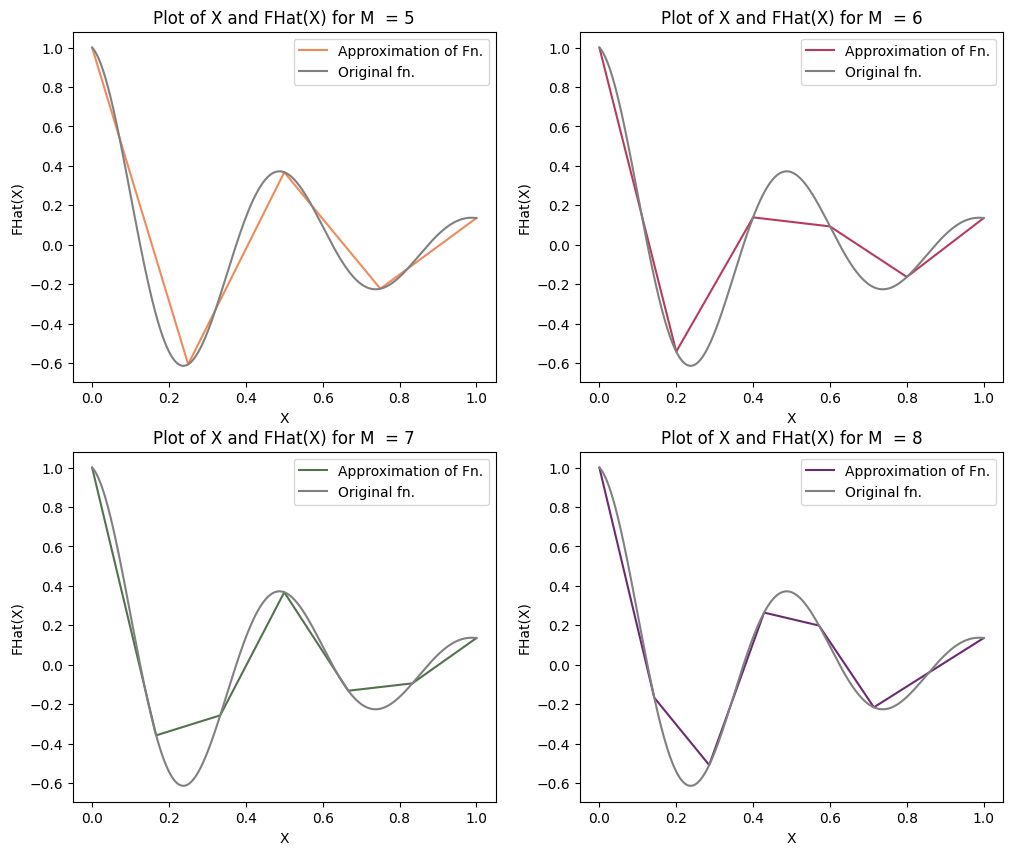

In [10]:
M_list_mono = [5, 6, 7, 8]
plotFHat(M_list_mono, colors)

### No, NMSE in dB doesn't decrease monotonically. For most of the values of M it does decrease monotonically but we can evidently see in the plot For values from M = 5 to M = 8 it increases and then it starts to decrease again. This is happening because for M = 5, M = 6 and M = 7, we can see that the sampling points correspond only to the peak points in both directions. It would be approximate a function, if we approximate a function by taking only the peak points into consideration. 

### 1] (d) iii] The minimum value of M for which NMSEdB is less than -40dB is M = 39. The total number of parameters in the network is [2(M) - 1]. Hence, it is 77.